Geometric Brownian Motion

In [ ]:
'''
s0= Current price
mu = mean returns
sigma = standard dviation of returns
steps = no of steps inb each path
T = length of each path
No_of_paths = no of paths
'''
import numpy as np
def gbm(s0,mu,sigma,steps,T,No_of_paths):
  paths=[]
  dt=T/steps
  for path in range(No_of_paths):
    prices=[s0]
    for step in range(steps):
      prices.append(prices[-1]*np.exp((mu-0.5*sigma**2)*dt+sigma*np.random.normal(0,np.sqrt(dt))))
    paths.append(prices)
  return paths

print(gbm(100,.10,.5,5,10,3))



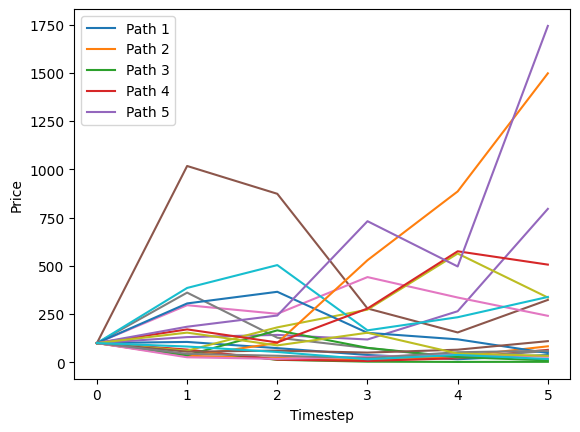

In [43]:
import matplotlib.pyplot as plt
plt.plot(np.array(gbm(100,.10,.5,5,10,20)).T.tolist())
plt.xlabel('Timestep')
plt.ylabel('Price')
plt.legend(['Path 1', 'Path 2', 'Path 3', 'Path 4', 'Path 5'])
plt.show()

Correlated Brownian Motion Path

In [72]:
W1=gbm(100,.10,.05,100,5,1)
W2=gbm(100,.08,.20,100,5,1)
rho=-0.8
W=np.dot(rho,W1[0])+np.dot((1-np.sqrt(1-rho*rho)),W2[0])

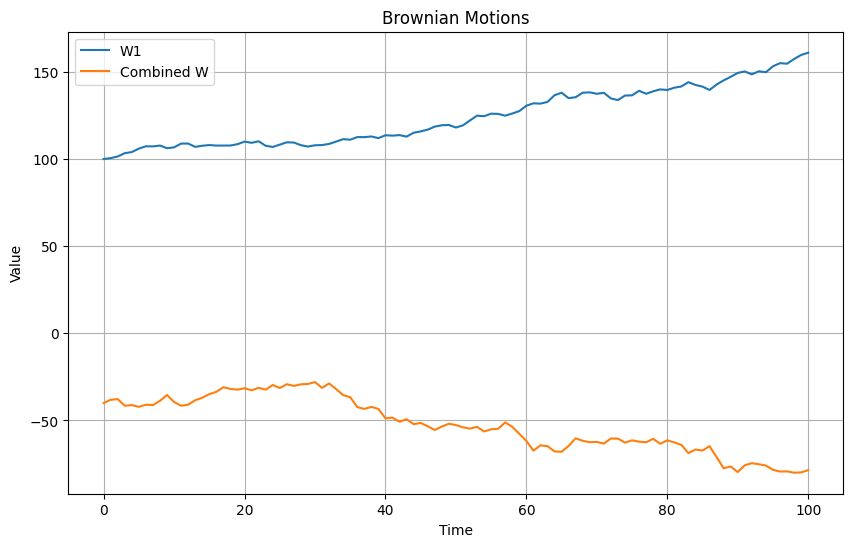

In [73]:
plt.figure(figsize=(10, 6))
plt.plot(W1[0], label='W1')
plt.plot(W, label='Combined W')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Brownian Motions')
plt.legend()
plt.grid(True)
plt.show()

In [93]:
W1=gbm(100,.10,.05,100,5,1)
W2=gbm(100,.08,.20,100,5,1)
rho=-0.8
# Define the correlation matrix
correlation_matrix = np.array([[1, 0.8], [0.8, 1]])

# Compute Cholesky decomposition
cholesky = np.linalg.cholesky(correlation_matrix)
W=np.dot(cholesky,[W1[0], W2[0]])

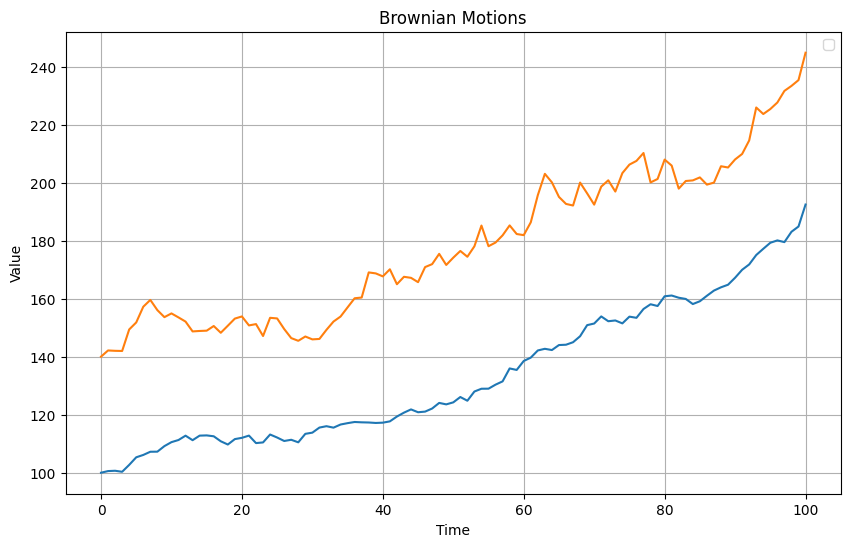

In [94]:
plt.figure(figsize=(10, 6))
plt.plot(W[0])
plt.plot(W[1])
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Brownian Motions')
plt.legend()
plt.grid(True)
plt.show()

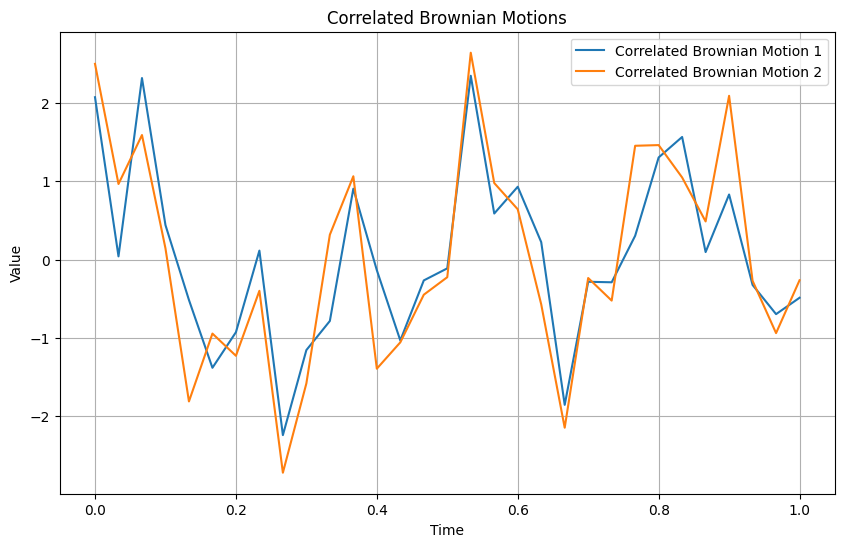

In [97]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
T = 1.0
N = 30
dt = T / N
paths = 2

# Generate uncorrelated Brownian motions
W_uncorrelated = np.random.normal(size=(paths, N+1))

# Define the correlation matrix
correlation_matrix = np.array([[1, 0.8], [0.8, 1]])

# Compute Cholesky decomposition
cholesky = np.linalg.cholesky(correlation_matrix)

# Transform uncorrelated Brownian motions into correlated Brownian motions
W_correlated = np.dot(cholesky, W_uncorrelated)

# Generate time vector
t = np.linspace(0.0, T, N+1)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(t, W_correlated[0], label='Correlated Brownian Motion 1')
plt.plot(t, W_correlated[1], label='Correlated Brownian Motion 2')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Correlated Brownian Motions')
plt.legend()
plt.grid(True)
plt.show()
